Finanzas Corporativas.

**Grupo:** 003.

**Prof.** Lic. Hazael Ruíz Díaz.

**Integrantes:**
* Angel Emmanuel Hernández Galván.
* Alma Cecilia Villarreal Duarte.
* Dayana Guadalupe Reyes Joaquin.

# Arca Continental.

## Análisis Técnico.

In [2]:
library("quantmod")

Warning message:
"package 'quantmod' was built under R version 4.1.1"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.1.1"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.1.1"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 4.1.1"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
prices = getSymbols("AC.MX", from = "2018-06-01", to = "2021-06-01")

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




In [4]:
head(`AC.MX`,n=3)

           AC.MX.Open AC.MX.High AC.MX.Low AC.MX.Close AC.MX.Volume
2018-06-01     119.48     120.84    118.49      119.27      1429208
2018-06-04     119.17     119.17    115.30      115.72      1607632
2018-06-05     115.40     117.41    115.00      116.87       893321
           AC.MX.Adjusted
2018-06-01       106.6832
2018-06-04       103.5079
2018-06-05       104.5365

In [5]:
tail(`AC.MX`,n=3)

           AC.MX.Open AC.MX.High AC.MX.Low AC.MX.Close AC.MX.Volume
2021-05-27     109.49     110.00    105.24      106.60      6731642
2021-05-28     107.17     111.30    105.00      110.95      2365028
2021-05-31     110.95     114.99    110.84      113.04       849615
           AC.MX.Adjusted
2021-05-27       105.3102
2021-05-28       109.6075
2021-05-31       111.6723

**Gráfico de líneas.**

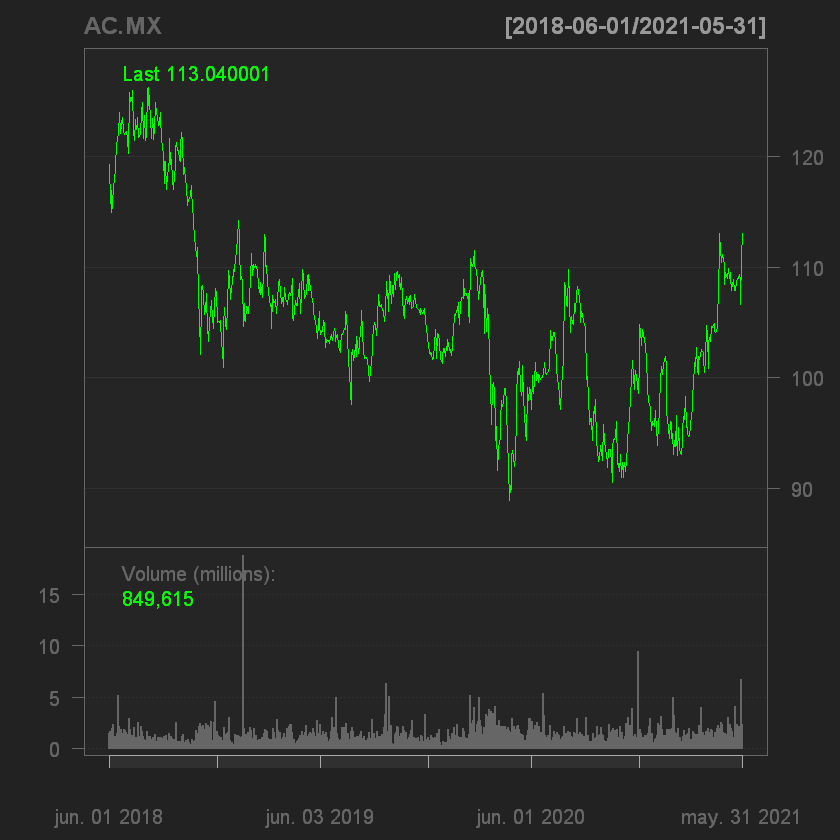

In [47]:
chartSeries(`AC.MX`,
            type="line",
            subset='2018-06::2021-06',
            theme=chartTheme('black'))

**Gráfico de barras.**

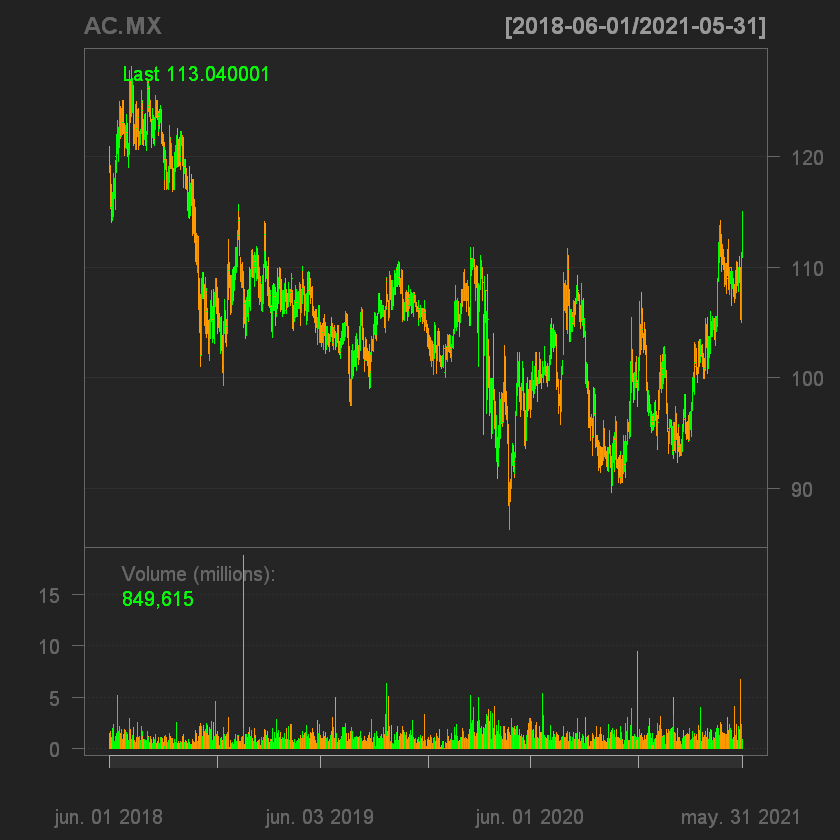

In [7]:
chartSeries(`AC.MX`,
            type="bar",
            subset='2018-06::2021-06',
            theme=chartTheme('black'))

**Gráfico de velas.**

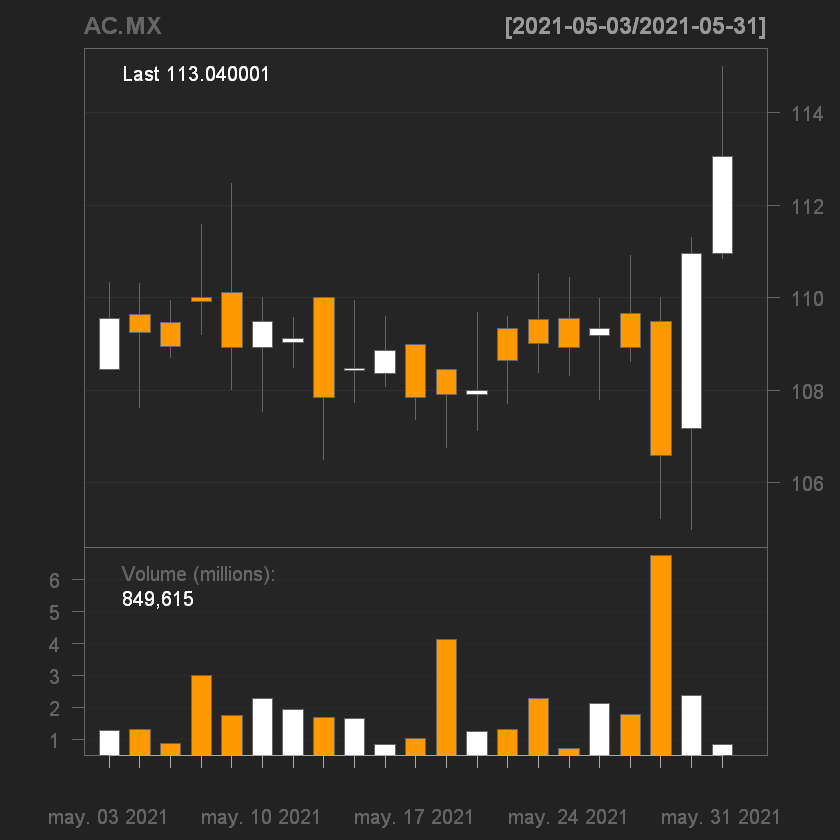

In [8]:
chartSeries(`AC.MX`,
            type="candlesticks",
            subset='2021-05',
            up.col = 'white',
            down.col = 'black',
            theme=chartTheme('black'))

**Media móvil de 200 días.**

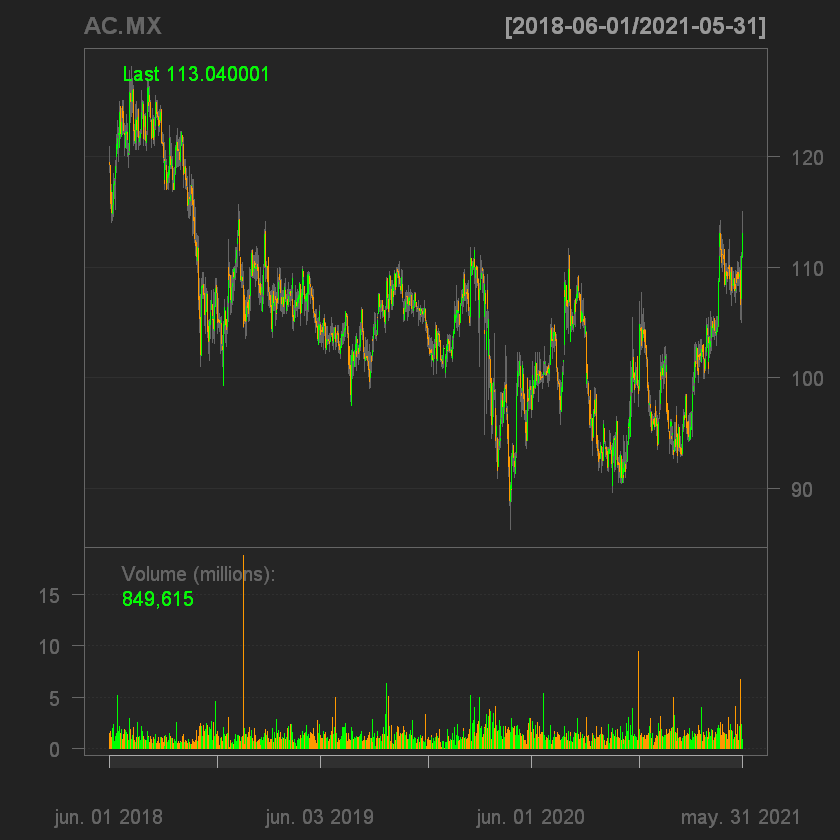

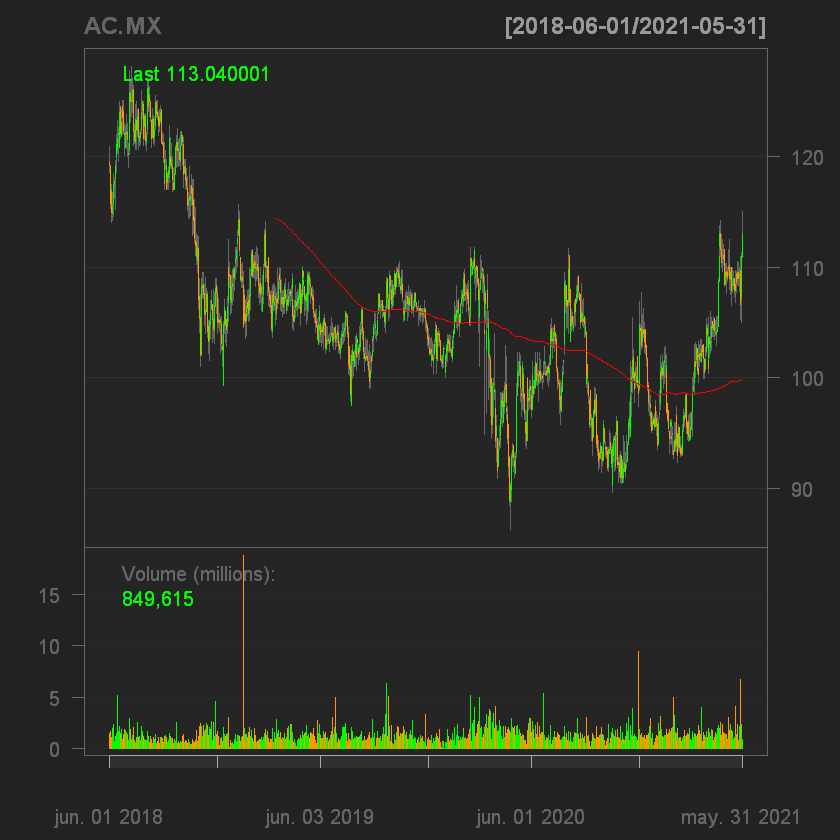

In [9]:
chartSeries(`AC.MX`,
            subset='2018-06::2021-06',
            theme=chartTheme('black')
            )
addSMA(n=200,on=1,col = "red")

**Bandas de Bollinger**

*Últimos 20 días.*

In [10]:
myBBands <- function (price,n,sd){
  mavg <- SMA(price,n)
  sdev <- rep(0,n)
  N <- nrow(price)
  for (i in (n+1):N){
    sdev[i]<- sd(price[(i-n+1):i])
  }
  sdev <- sqrt((n-1)/n)*sdev
  up <- mavg + sd*sdev
  dn <- mavg - sd*sdev
  pctB <- (price - dn)/(up - dn)
  output <- cbind(dn, mavg, up, pctB)
  colnames(output) <- c("dn", "mavg", "up", 
        "pctB")
  return(output)
}
p<-na.omit(`AC.MX`)
bb <-myBBands(Cl(p),n=20,sd=2)
tail(bb,n=5)

                 dn     mavg       up       pctB
2021-05-25 107.4518 108.9665 110.4812  0.6199938
2021-05-26 107.6003 108.8750 110.1498  0.5176496
2021-05-27 107.2070 108.6990 110.1910 -0.2033968
2021-05-28 107.0441 108.8235 110.6029  1.0975403
2021-05-31 106.4496 108.9985 111.5474  1.2928001

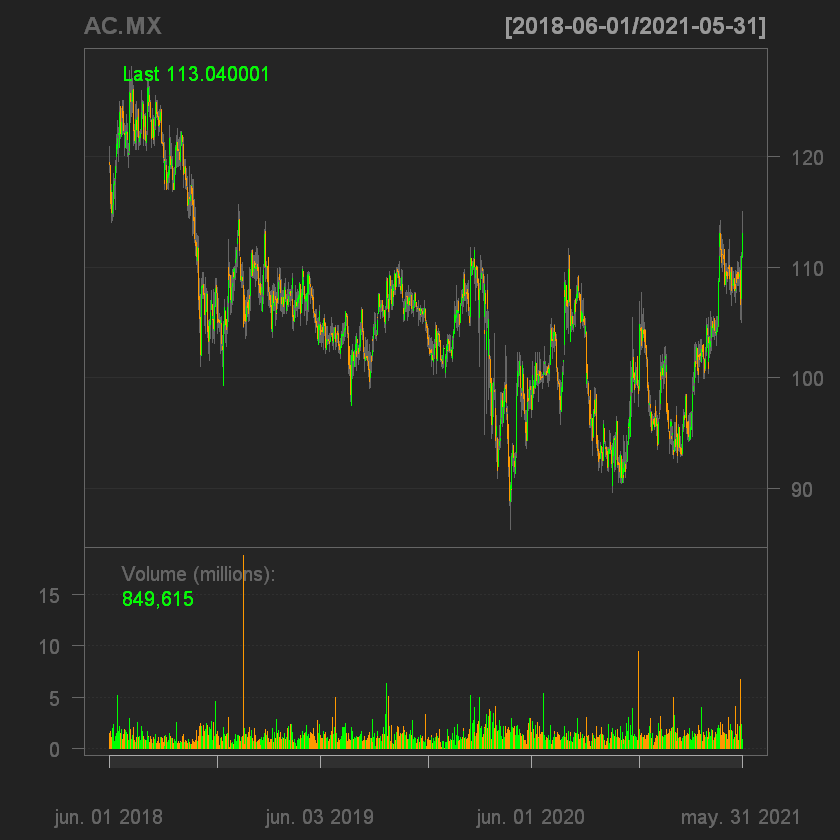

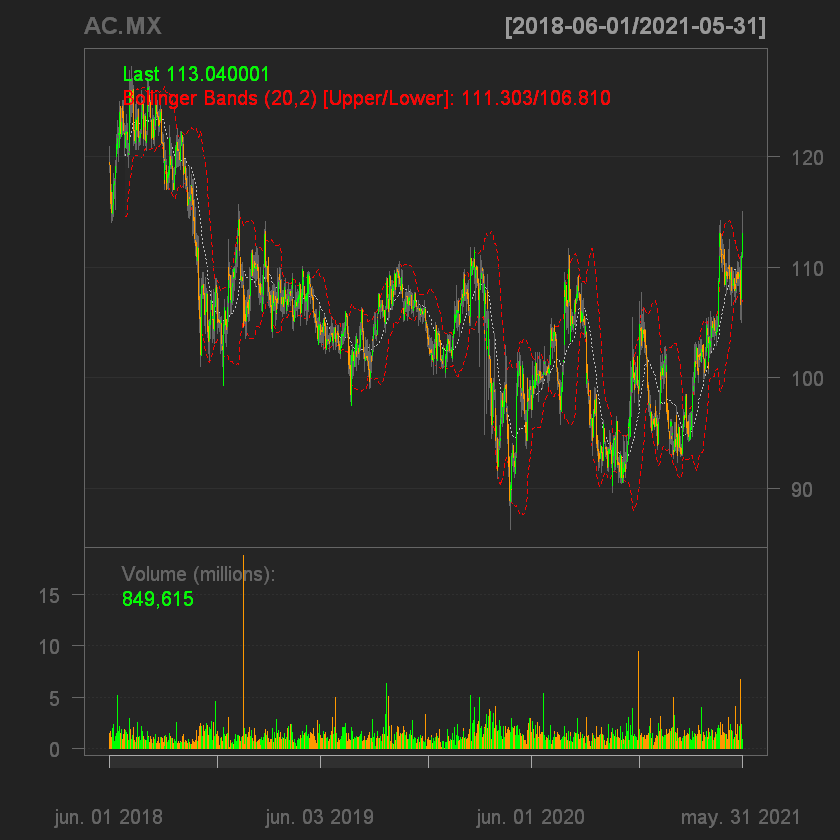

In [48]:
chartSeries(`AC.MX`,
            subset='2018-06::2021-06',
            theme=chartTheme('black'))
addBBands(n=20,sd=2)

**Rendimientos**

In [11]:
library("PerformanceAnalytics")

Warning message:
"package 'PerformanceAnalytics' was built under R version 4.1.1"

Attaching package: 'PerformanceAnalytics'


The following object is masked _by_ '.GlobalEnv':

    prices


The following object is masked from 'package:graphics':

    legend




In [12]:
priceAC<-AC.MX$AC.MX.Close

In [52]:
length(priceAC)

[1] 753

In [13]:
min(priceAC)

[1] 88.9

In [14]:
max(priceAC)

[1] 126.2

In [15]:
retorno<-Return.calculate(priceAC)

In [17]:
tail(retorno, n=10)

             AC.MX.Close
2021-05-18  0.0005564355
2021-05-19  0.0008340686
2021-05-20  0.0061117142
2021-05-21  0.0033133916
2021-05-24 -0.0007338960
2021-05-25  0.0036721013
2021-05-26 -0.0037501509
2021-05-27 -0.0213000371
2021-05-28  0.0408067456
2021-05-31  0.0188373507

## Serie de tiempo y tendencias

In [18]:
library(tseries)
library(TSA)

Warning message:
"package 'tseries' was built under R version 4.1.1"
Warning message:
"package 'TSA' was built under R version 4.1.1"

Attaching package: 'TSA'


The following objects are masked from 'package:PerformanceAnalytics':

    kurtosis, skewness


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [74]:
priceSerie <- ts(priceAC, start= c(2018,104), end = c(2021, 103), frequency = 251)

In [75]:
head(priceSerie)

AC.MX.Close
119.27
115.72
116.87
114.94
115.56
117.41


In [76]:
tail(priceSerie)

AC.MX.Close
108.93
109.33
108.92
106.60
110.95
113.04


In [77]:
start(priceSerie)
end(priceSerie)
class(priceSerie)
tail(time(priceSerie),12)

[1] 2018  104

[1] 2021  103

[1] "ts"

[1] 2021.363 2021.367 2021.371 2021.375 2021.378 2021.382 2021.386 2021.390
 [9] 2021.394 2021.398 2021.402 2021.406

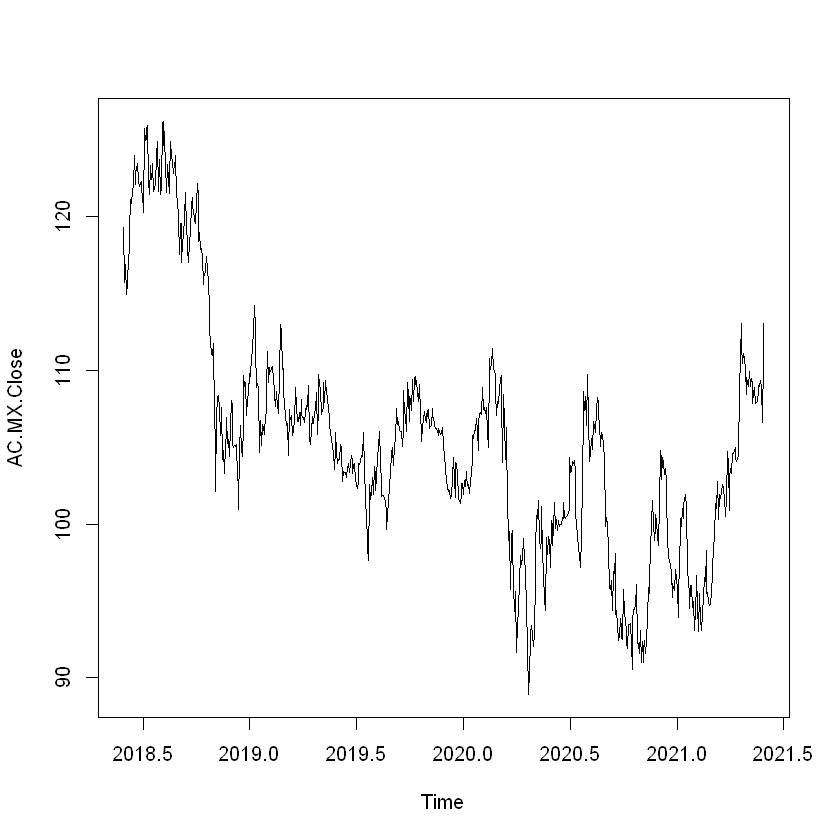

In [78]:
plot(priceSerie)

### Clasificación

In [79]:
tend <- lm(priceSerie~time(priceSerie), data = priceSerie)

In [80]:
summary(tend)


Call:
lm(formula = priceSerie ~ time(priceSerie), data = priceSerie)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.111  -3.899  -1.314   3.848  17.055 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      12963.8788   474.4720   27.32   <2e-16 ***
time(priceSerie)    -6.3658     0.2349  -27.10   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.582 on 751 degrees of freedom
Multiple R-squared:  0.4944,	Adjusted R-squared:  0.4937 
F-statistic: 734.4 on 1 and 751 DF,  p-value: < 2.2e-16


In [81]:
tc <- as.numeric(time(priceSerie))
tenc<-lm(priceSerie~poly(tc, degree=4))
summary(tenc)


Call:
lm(formula = priceSerie ~ poly(tc, degree = 4))

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8664  -2.5683   0.0431   2.5466  11.2447 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            105.5215     0.1470 717.580   <2e-16 ***
poly(tc, degree = 4)1 -151.2800     4.0352 -37.490   <2e-16 ***
poly(tc, degree = 4)2   88.2123     4.0352  21.861   <2e-16 ***
poly(tc, degree = 4)3   -0.0748     4.0352  -0.019    0.985    
poly(tc, degree = 4)4   58.6589     4.0352  14.537   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.035 on 748 degrees of freedom
Multiple R-squared:  0.7369,	Adjusted R-squared:  0.7355 
F-statistic: 523.7 on 4 and 748 DF,  p-value: < 2.2e-16


In [82]:
logtime <-log(time(priceSerie))
tlog<-lm(priceSerie~logtime)
summary(tlog)


Call:
lm(formula = priceSerie ~ logtime)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.109  -3.899  -1.313   3.848  17.053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97978.9     3610.7   27.14   <2e-16 ***
logtime     -12859.8      474.4  -27.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.582 on 751 degrees of freedom
Multiple R-squared:  0.4945,	Adjusted R-squared:  0.4939 
F-statistic: 734.8 on 1 and 751 DF,  p-value: < 2.2e-16


In [83]:
logPrice <- log(priceSerie)
te <- lm(logPrice~time(priceSerie))
summary(te)


Call:
lm(formula = logPrice ~ time(priceSerie))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14534 -0.03614 -0.01128  0.03647  0.16025 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      124.288531   4.438524   28.00   <2e-16 ***
time(priceSerie)  -0.059227   0.002197  -26.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05222 on 751 degrees of freedom
Multiple R-squared:  0.4917,	Adjusted R-squared:  0.491 
F-statistic: 726.5 on 1 and 751 DF,  p-value: < 2.2e-16


In [84]:
adf.test(priceSerie, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  priceSerie
Dickey-Fuller = -1.8543, Lag order = 9, p-value = 0.64
alternative hypothesis: stationary


### Conclusión 

No tiene regresión con un R cuadrado suficientemente bueno ni varianza

Por lo tanto: 
* NO estacionaria en varianza
* NO estacionaria en media

### Correción

In [85]:
C1 <- diff(log(priceSerie))

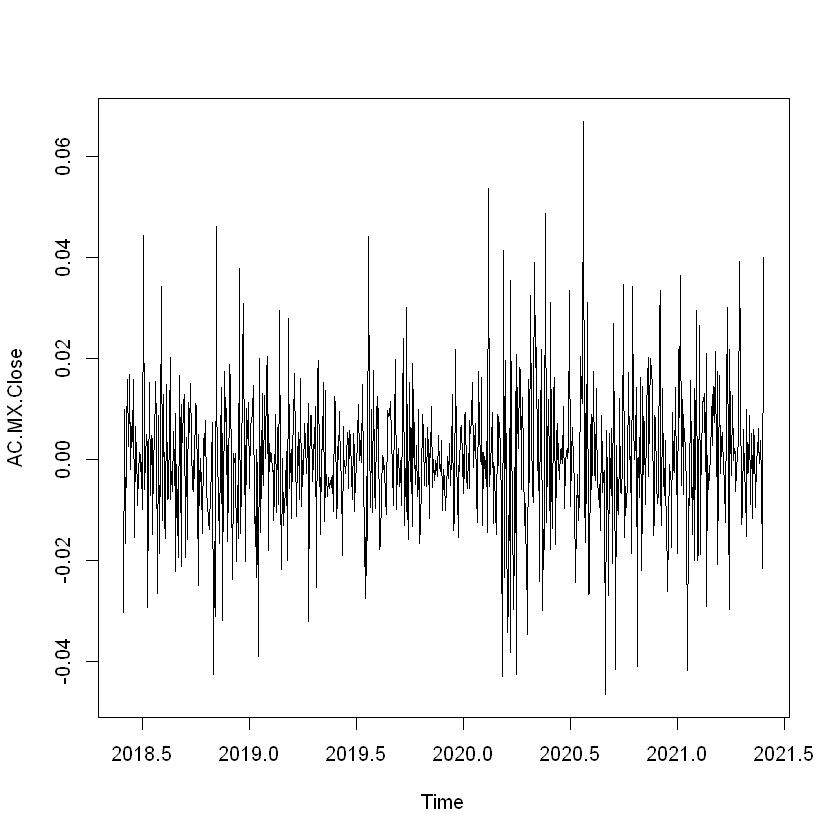

In [86]:
plot(C1)

In [87]:
tc <- as.numeric(time(C1))
tenc<-lm(C1~poly(tc, degree=4))
summary(tenc)


Call:
lm(formula = C1 ~ poly(tc, degree = 4))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046115 -0.007448 -0.000429  0.007885  0.067368 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)           -7.134e-05  5.095e-04  -0.140    0.889
poly(tc, degree = 4)1  1.244e-02  1.397e-02   0.890    0.374
poly(tc, degree = 4)2  1.013e-02  1.397e-02   0.725    0.468
poly(tc, degree = 4)3  6.786e-03  1.397e-02   0.486    0.627
poly(tc, degree = 4)4  1.255e-02  1.397e-02   0.899    0.369

Residual standard error: 0.01397 on 747 degrees of freedom
Multiple R-squared:  0.003152,	Adjusted R-squared:  -0.002186 
F-statistic: 0.5905 on 4 and 747 DF,  p-value: 0.6696


In [88]:
adf.test(C1, alternative="stationary")

Warning message in adf.test(C1, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  C1
Dickey-Fuller = -10.735, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


### Conclusión de la primer corrección

La serie es estacionaria en media y varianza

## Modelado

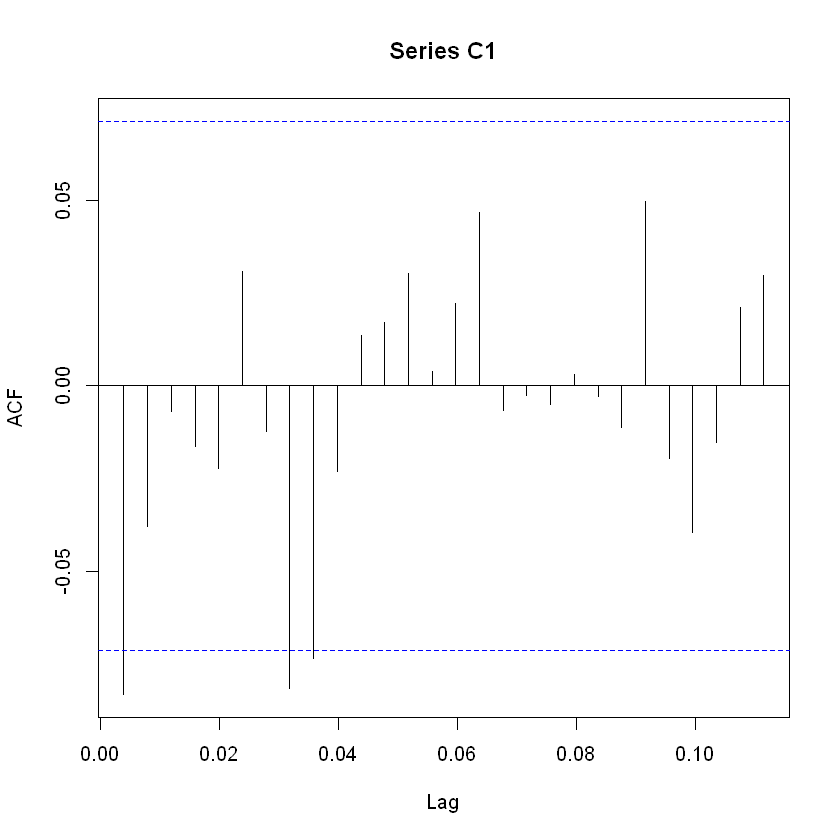

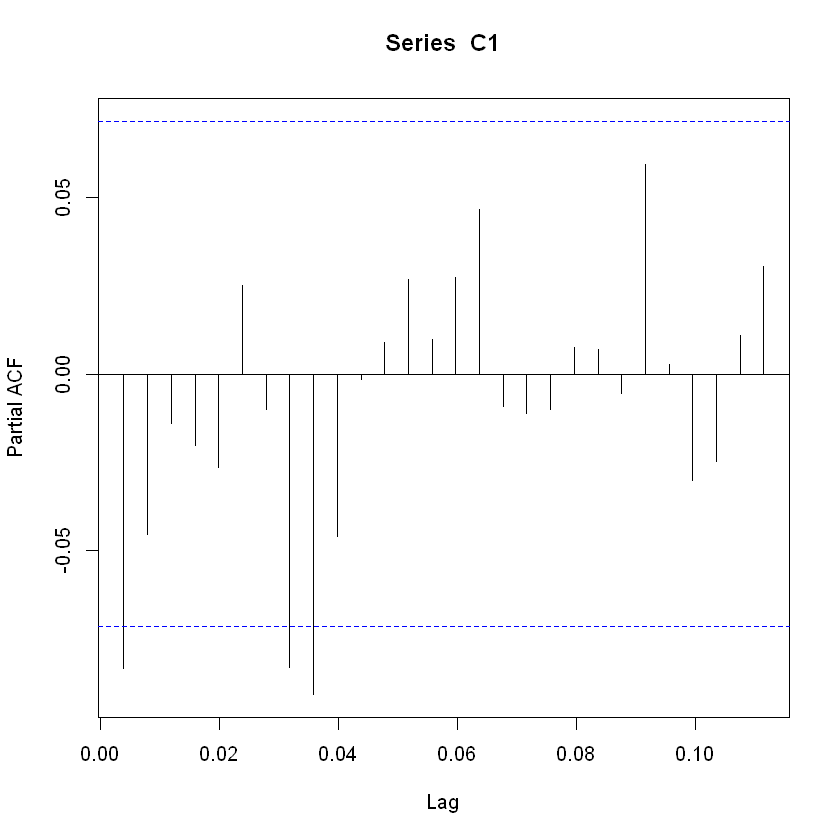

In [89]:
acf(C1) 
pacf(C1) 

### Modelado AR

In [90]:
ar(C1)


Call:
ar(x = C1)

Coefficients:
      1  
-0.0834  

Order selected 1  sigma^2 estimated as  0.0001937

In [92]:
AIC(arima(C1, order = c(1,0,0), method = 'ML'))

[1] -4290.857

### Modelado MA

In [93]:
aic0<-Inf # le das un numero muy grande
for (i in 1:20)
{
  aic1<-AIC(arima(C1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
MA.mejor
aic0 

[1] 1

[1] -4291.36

### Modelo ARMA

In [94]:
arma.aic<-Inf
for(j in 1:8)
{
  for (i in 1:15)
  {
    aux<-AIC(arima(C1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
ARMA.mejor
arma.aic

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in log(s2):
"Se han producido NaNs"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possi

[1] 1 1

[1] -4292.256

### Ruido Blanco

In [95]:
res<-residuals(arima(C1, order=c(1,1,1), method = 'ML'))

In [96]:
mean(res)

[1] 0.000310977

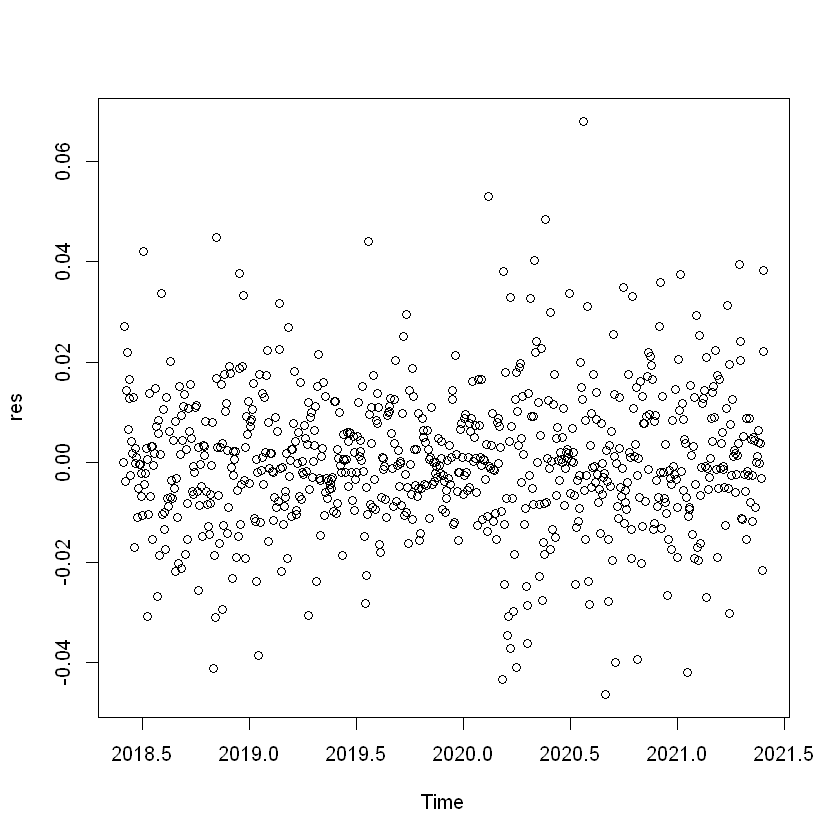

In [97]:
plot(res, type="p")

##### Incorrelación

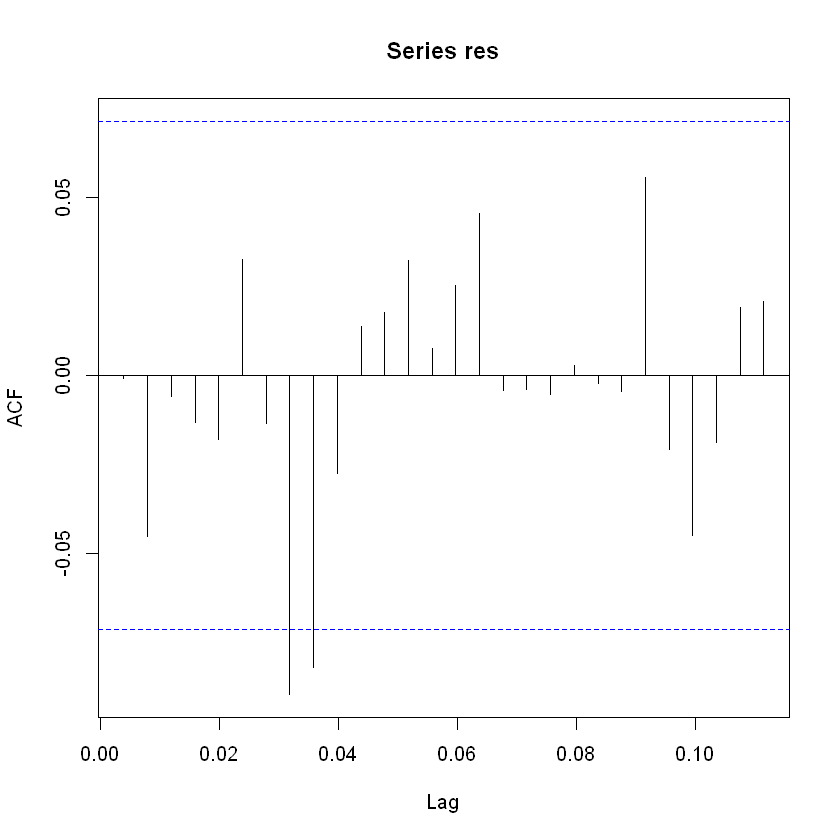

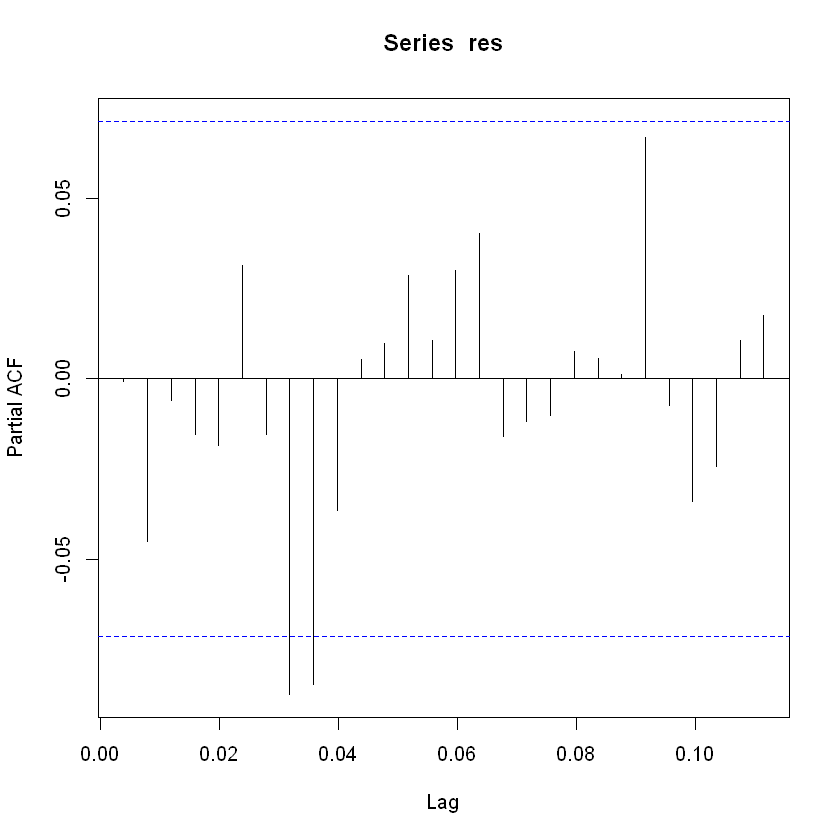

In [98]:
acf(res) 
pacf(res) 

In [99]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.00048973, df = 1, p-value = 0.9823


In [100]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.97498, p-value = 4.78e-10


### Predicción

In [108]:
tail(priceSerie)

AC.MX.Close
108.93
109.33
108.92
106.60
110.95
113.04


In [105]:
Pred <- predict(arima(priceSerie, order=c(6, 1,9), method="ML"), n.ahead=20)$pred
head(Pred)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


[1] 112.2747 111.8158 112.0059 111.9244 112.0011 111.9306

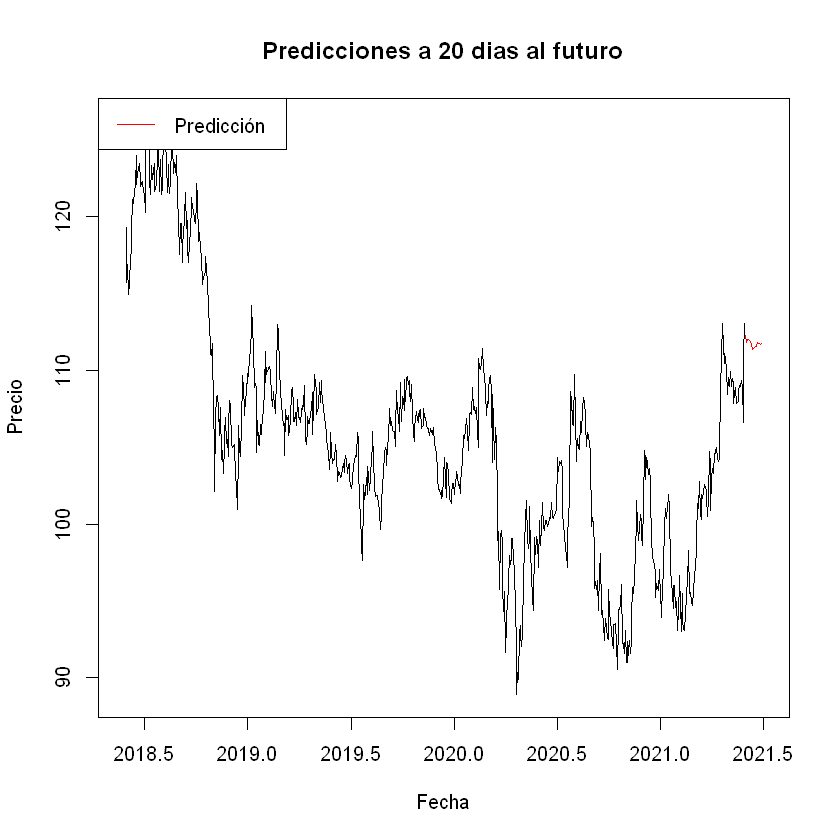

In [106]:
plot(priceSerie,
    main = 'Predicciones a 20 dias al futuro',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2018.4, 2021.5))
lines(Pred, 
      col="red")
legend('topleft', 
       legend = c('Predicción'),
        col = c('red'),
      lty = 1)

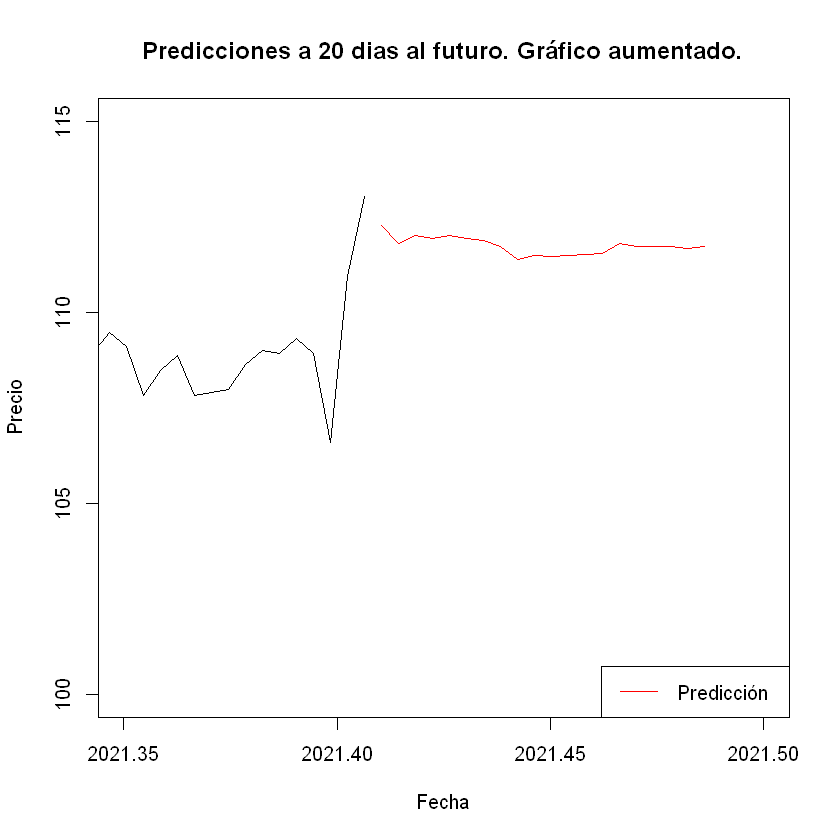

In [109]:
plot(priceSerie,
    main = 'Predicciones a 20 dias al futuro. Gráfico aumentado.',
    xlab = 'Fecha',
    ylab = 'Precio',
    xlim = c(2021.35, 2021.5),
    ylim = c(100, 115))
lines(Pred, 
      col="red")
legend('bottomright', 
       legend = c('Predicción'),
        col = c('red'),
      lty = 1)

In [1]:
install.packages("FinancialMath")

package 'FinancialMath' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\almac\AppData\Local\Temp\Rtmp8Alb37\downloaded_packages


# Análisis de Escenarios.

## FUNCIONES

In [2]:
# /// NO MODIFICAR
library(FinancialMath)

D.unif <- function(n,min,max){
  floor(max-min*runif(n)) + 1
}

VPN <- function(tasa, variacion){
  
  variacion <- 0.02
  tasa <- 0.0705
  
  Mercado <- 20000
  ParticipacionMercado <- rnorm(5,0.08, 0.03)
  ParticipacionMercado
  Ventas <- Mercado * ParticipacionMercado
  Ventas
  CostosVentas <- (1.05/(10^ParticipacionMercado))*.46*Ventas
  CostosVentas
  CostosOperacionales <- (0.60+2*ParticipacionMercado)*.40*Ventas
  CostosOperacionales
  
  aumento_precio <- rep(0.02,4)
  aumento_precio <- aumento_precio * (1+(runif(4,0,variacion*2)-variacion))
  aumento_precio <- c(0, aumento_precio)
  aumento_precio
  
  aumento_costo <- rep(0.05,4)
  aumento_costo <- aumento_costo * (1+(runif(4,0,variacion*2)-variacion))
  aumento_costo <- c(0, aumento_costo)
  
  Ventas <- Ventas*(1+aumento_precio)
  CostosVentas <- CostosVentas*(1+aumento_costo)
  
  Ventas
  CostosVentas
  CostosOperacionales
  
  flujo_total <- Ventas - CostosVentas - CostosOperacionales 
  flujo_total
  
  flujo_total/Ventas
  
  Resul <- c(flujo_total, Ventas, CostosVentas, CostosOperacionales)
  return(Resul)
}

Escenarios <- function(n,t,v){
  Optimista <- 0
  Pesimista <- Inf
  Mult_VPN <- c()
  for (i in 1:n) {
    Resultados <- VPN(t,v)
    VPNC <- 0
    for (j in 1:5) {
      VPNC <- VPNC + (Resultados[j] / (1+t)^j)
    }
    VPNC <- VPNC - 2000
    Mult_VPN[i] <- VPNC
    if(VPNC >= max(Mult_VPN)){
      Optimista <- c(Resultados, VPNC)
    }
    if(VPNC <= min(Mult_VPN)){
      Pesimista <- c(Resultados, VPNC)
    }
  }
  
  plot(Mult_VPN, type = 'l', col = 'blue', main = "VPN simulados")
  abline( mean(Mult_VPN), c(0,n),
          col = 'red')
  
  hist(Mult_VPN)
  
  Analisis <- c(mean(Mult_VPN),  mean(Optimista[6:10]), mean(Optimista[11:15]), mean(Optimista[16:20]), mean(Optimista[1:5]), mean(Pesimista[6:10]), mean(Pesimista[11:15]), mean(Pesimista[16:20]),  mean(Pesimista[1:5]), Optimista[21], Pesimista[21])
  return(Analisis)
}


## EJECUCION DEL PROGRAMA

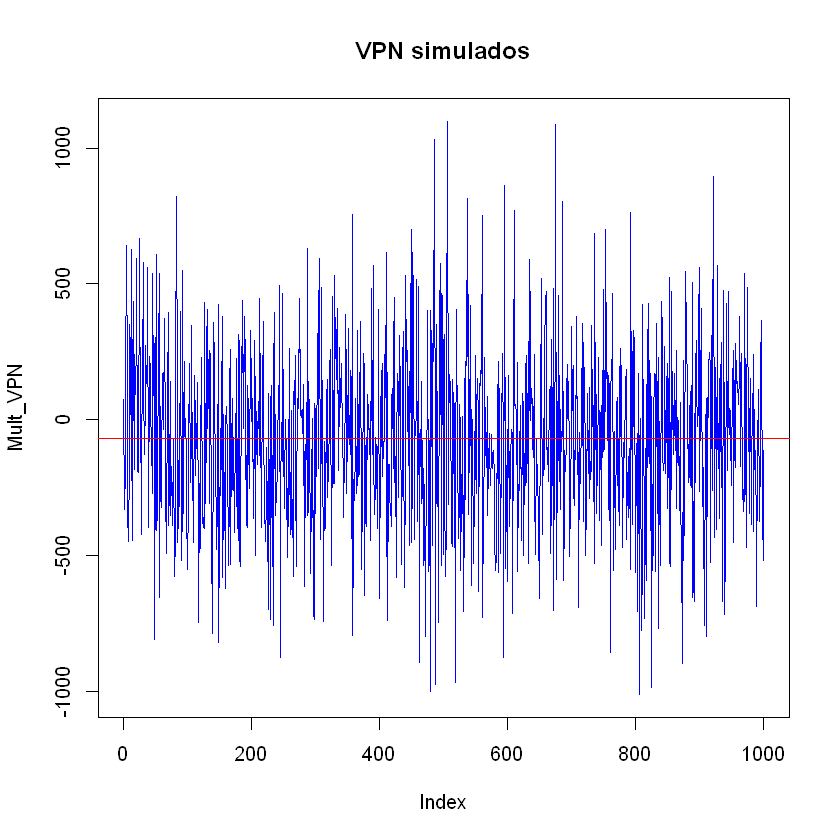

Conceptos,Pesimista,Neutral,Optimista
VPN,-1013.0610,42.91092,1098.8829
Ventas,847.2551,1730.92186,2614.5886
Costos de ventas,373.5965,654.62505,935.6536
Costos operativos,233.4763,572.03701,910.5978
Ebitda,240.1823,504.25980,768.3373


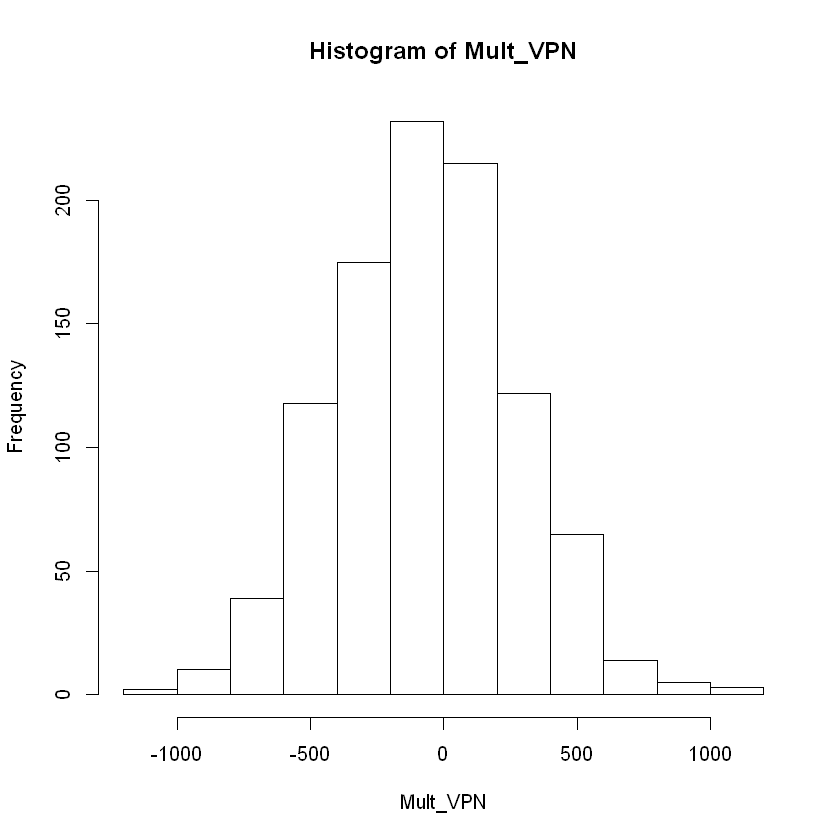

In [3]:
# /// MODIFICAR VARIABLES PARA OBTENER CAMBIOS
Simulacion <- Escenarios(1000,.0705,0.02)
Estados <- data.frame(
  'Conceptos' = c('VPN', 'Ventas', 'Costos de ventas', 'Costos operativos', 'Ebitda'),
  "Pesimista" = c(Simulacion[11], Simulacion[6],Simulacion[7],Simulacion[8],Simulacion[9]),
  "Neutral" = c((Simulacion[10]+Simulacion[11])/2, (Simulacion[6]+Simulacion[2])/2,(Simulacion[7]+Simulacion[3])/2,(Simulacion[8]+Simulacion[4])/2,(Simulacion[9]+Simulacion[5])/2),
  "Optimista" = c(Simulacion[10], Simulacion[2],Simulacion[3],Simulacion[4],Simulacion[5])
)
Estados